> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No-show appointments Data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project, we will analyzing data that collected from 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment. In particular we will search for reasons or factors that affect patients in order to show up or not


### Question(s) for Analysis




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.2
    Uninstalling pandas-1.3.2:
      Successfully uninstalled pandas-1.3.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\carnival\\anaconda3\\lib\\site-packages\\~andas\\_libs\\algos.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [8]:
conda update --force-reinstall pandas

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Carnival\Anaconda3

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.9.30  |       haa95532_1         116 KB
    cryptography-3.4.8         |   py37h71e12ea_0         634 KB
    decorator-5.1.0            |     pyhd3eb1b0_0          14 KB
    flask-2.0.1                |     pyhd3eb1b0_0          78 KB
    ipykernel-6.4.1            |   py37haa95532_1         191 KB
    jupyter_core-4.8.1         |   py37haa95532_0          90 KB
    jupyterlab_server-2.8.2    |     pyhd3eb1b0_0          46 KB
    networkx-2.6.3             |     pyhd3eb1b0_0         1.3 MB
    nltk-3.6.3                 |     pyhd3eb1b0_0         991 KB
    openpyxl-3.0.9             |     pyhd3eb1b0_0         164 KB
    pandas-1.3.3               |   py37h6214cd6_0   

<a id='wrangling'></a>
## Data Wrangling






In [3]:
df = pd.read_csv(r"I:\SQL\Fwd\Data analysis - Professinal\Invistegate a dataset project\KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#checking for null values and dulicate rows
df.isnull().sum().sum(), df.duplicated().sum()

(0, 0)

There are no null values in all columns.
There are no duplicated rows in the data.
Data is clean


### Data Cleaning

 

### there are two columns (scheduledday, appointmentday) have wrong data type  so we should convert from object into datetime

In [47]:
# using datetime function to convert from object into datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

### there is a value in age column less than zero. It doesn't make sense so we should drop it

In [8]:
# delete age less than zero
i = df[(df.Age < 0)].index
df.drop(i, inplace =  True)

### there are wrong names for columns. I will fix it 

In [5]:
#fix spelling of some columns 
df.rename(columns = {'Hipertension':'Hypertension', 'Handcap':'Handicap', 'No-show':'No_show'}, inplace = True)

#confirm changes
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis







### Question_1: What is the number of female and male patients ?

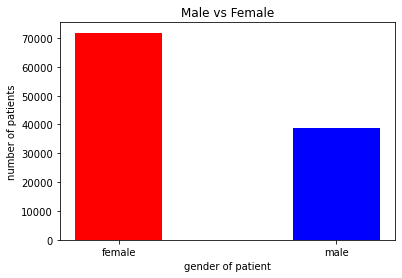

In [6]:
f_counts = df["Gender"].value_counts()[0]
m_counst = df["Gender"].value_counts()[1]
locations = ['female', 'male']
counts = (f_counts, m_counst)
plt.bar(locations, counts, color= ['red', 'blue'], width = 0.4)
plt.title("Male vs Female")
plt.xlabel("gender of patient")
plt.ylabel('number of patients')
plt.show()


We can notice that number of female patients is larger than number of male patients 

### Question_2  :How is age affecting the patient's absence ?

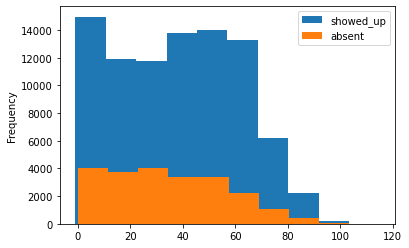

showed up Appointments Mean Age:37.79
abesnt Appointments Mean Age:34.32


In [9]:
showup = (df.No_show == 'No')
absent = (df.No_show == 'Yes')

df[showup].Age.plot.hist()
df[absent].Age.plot.hist()
plt.legend(['showed_up', 'absent'])
plt.show()
print('showed up Appointments Mean Age:{:.2f}'.format(df[showup].Age.mean()))
print('abesnt Appointments Mean Age:{:.2f}'.format(df[absent].Age.mean()))

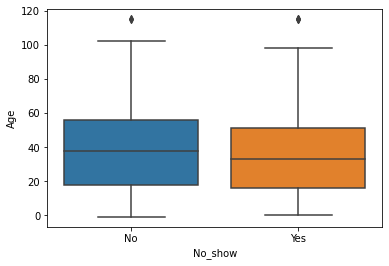

In [10]:
#age distribution
sns.boxplot(x=df.No_show, y=df.Age)
plt.show()

The two graphs above shows that age from (0 to 5) and (25 to 40) and (45 to 60) are the most patients showed up. also it's obvious that the graph skewed to the right

### Question_3 :How does each month compare to the others in terms of no-show appointment?

In [52]:
df['MonthOfYear'] = df.AppointmentDay.dt.month_name(locale = 'English')

In [43]:
df.MonthOfYear.value_counts().to_frame(name='Number of Appointments')

,Number of Appointments
May,80841
June,26451
April,3235


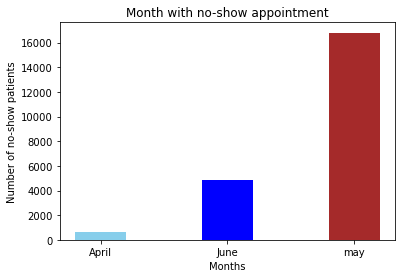

In [41]:
x = df.groupby(['MonthOfYear'])['No_show'].value_counts()
location = ['April', 'June', 'may']
heights = (x[1], x[3], x[5])
plt.bar(location, heights, width = 0.4, color = ['skyblue', 'blue', 'brown'])
plt.xlabel("Months")
plt.ylabel("Number of no-show patients")
plt.title("Month with no-show appointment")
plt.show()


Most of the patients didn't attend in the month of may unlike april is much less

### Question_4 :What is the proportion of show up and no show patients ?

In [12]:
#total patients
Total = show_up.sum() + absent.sum()

#proportion of show_up patients
showup_proportion =float(show_up.sum() / Total) * 100 
showup_proportion = round(showup_proportion, 1)

#proportion of absent patients
absent_proportion = float(absent.sum() / Total) * 100
absent_proportion = round(absent_proportion, 1)

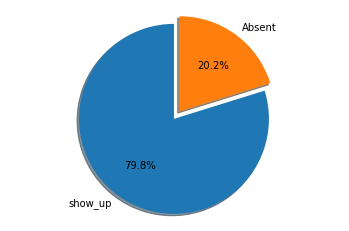

In [13]:
labels = ['show_up', 'Absent']
sizes = [showup_proportion, absent_proportion]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


### Question_5 :How many patients attended and didn't attend according to the gender ?

In [14]:
counts = df.groupby(['Gender'])['No_show'].value_counts()
f = counts.F
m = counts.M
f

No_show
No     57245
Yes    14594
Name: No_show, dtype: int64

In [15]:
ind = np.arange(len(m))  # the x locations for the groups
width = 0.35  

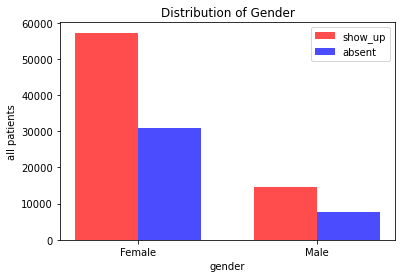

In [16]:
# plot bars
red_bars = plt.bar(ind, f, width, color='r', alpha=.7, label='show_up')
blue_bars = plt.bar(ind + width, m, width, color='b', alpha=.7, label='absent')

# title and labels
plt.ylabel('all patients')
plt.xlabel('gender')
plt.title('Distribution of Gender')
locations = ind + width / 2  # xtick locations
labels = ['Female', 'Male']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

We can notice that number of females that attended and didn't attend the appointment is larger than number of males

### Question_6 :Compare between the patient who show up and didn’t show the appointment and whether or not the patient is enrolled in the scholarship ?

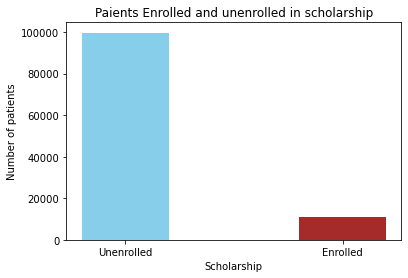

In [39]:
count = df.groupby(['Scholarship'])['No_show'].count()
locations = ['Unenrolled', 'Enrolled']
hights = (count[0], count[1])
plt.bar(locations, hights, color = ['skyblue', 'brown'], width =0.4)
plt.xlabel("Scholarship")
plt.ylabel("Number of patients")
plt.title("Paients Enrolled and unenrolled in scholarship")
plt.show()

From the bar chart we can see that the patients who unenrolled in the scholarship whether showed up or absent are much greater than who enrolled in the scholarship

Text(0.5, 1.0, "Patients didn't enroll in the scholarship")

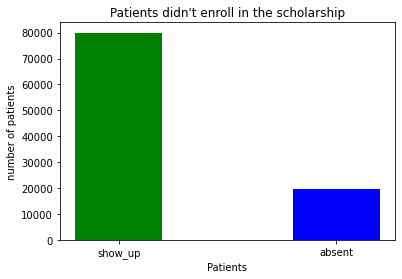

In [56]:
number = df.groupby(['Scholarship'])['No_show'].value_counts()
locations = ['show_up', 'absent']
heights = (number[0][0], number[0][1])
plt.bar(locations, heights, color = ['green', 'blue'], width = 0.4)
plt.xlabel("Patients")
plt.ylabel("number of patients")
plt.title("Patients didn't enroll in the scholarship")

Here illustrates that patients that didn't enroll in the scholarship and showed up are larger than who didn't enroll and absent

Text(0.5, 1.0, 'Patients enrolled in the scholarship')

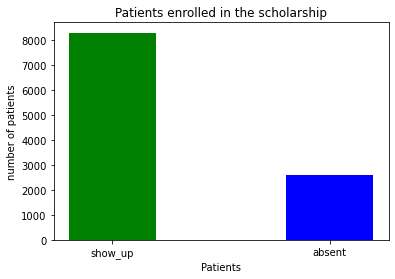

In [55]:
number = df.groupby(['Scholarship'])['No_show'].value_counts()
locations = ['show_up', 'absent']
heights = (number[1][0], number[1][1])
plt.bar(locations, heights, color = ['green', 'blue'], width = 0.4)
plt.xlabel("Patients")
plt.ylabel("number of patients")
plt.title("Patients enrolled in the scholarship")

Here, is the same as previous but associated with the patients who enrolled in the scholarship

### Question_7 :How many patients showed_up and didn't show_up according to the received SMS ?

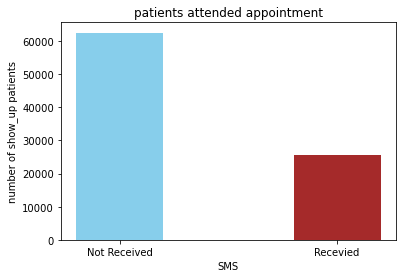

In [61]:
SMS = df.groupby(['SMS_received'])['No_show'].value_counts()
locations = ['Not Received', 'Recevied']
heights = (SMS[0][0], SMS[1][0])
plt.bar(locations, heights, color = ['skyblue', 'brown'], width = 0.4)
plt.xlabel("SMS")
plt.ylabel("number of show_up patients")
plt.title("patients attended appointment")
plt.show()

we can see here that the patients who didn't recieve SMS and showed up are larger than who recieved SMS and showed up as well 
and it doesn't make sense as the patients that get a remainder should be the most about showing up 

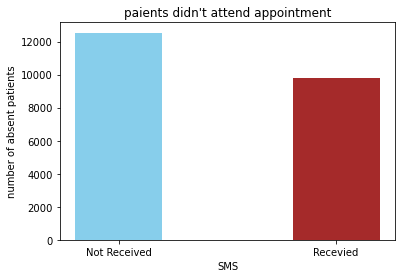

In [60]:
SMS = df.groupby(['SMS_received'])['No_show'].value_counts()
locations = ['Not Received', 'Recevied']
heights = (SMS[0][1], SMS[1][1])
plt.bar(locations, heights, color = ['skyblue', 'brown'], width = 0.4)
plt.xlabel("SMS")
plt.ylabel("number of absent patients")
plt.title("paients didn't attend appointment")
plt.show()

Here, as the same as previous but with the patints who didn't attned the appoinment

<a id='conclusions'></a>
## Conclusions

At the end, after analyzing the data we can see that there is one dependent variable (NO_show) and many independent variables such as gender and how it clear to see that number of female patients is greater than the male patients or let me say that they care about themselves much more than males.
Also the scholarship is something strange that in this welfare and didn't attend the appointment.
Moreover, the patients that received the SMS and showed_up should be greater than who didn't recieved but the opposit was occured.
Finally We can say that number of showed_up patients is greater than who didn't show and it's a great thing that people care about to be in a good health.
we can use the data after processing it in machine learning model to predict if the patients in the future will attend the appointment or not according to the features.




### Limitations
I think that data needs more details to be analyzed more better 



